In [3]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Machine Learning/Hands-On/Classification and Regression/loan_data.csv'
data = pd.read_csv(file_path)

print(data.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   lo

In [13]:
# Misalnya, kolom terakhir adalah target
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X = X.dropna()
y = y.dropna()


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
print(X_train.dtypes)
# model = RandomForestClassifier(random_state=42)
# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)

# print("Classification Report:")
# print(classification_report(y_test, y_pred))

# print("Accuracy Score:", accuracy_score(y_test, y_pred))


person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
dtype: object


In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encoding untuk gender dan default history
X_train['person_gender'] = le.fit_transform(X_train['person_gender'])
X_test['person_gender'] = le.transform(X_test['person_gender'])

X_train['previous_loan_defaults_on_file'] = le.fit_transform(X_train['previous_loan_defaults_on_file'])
X_test['previous_loan_defaults_on_file'] = le.transform(X_test['previous_loan_defaults_on_file'])


In [19]:
# One-Hot Encoding dengan pandas
X_train = pd.get_dummies(X_train, columns=['person_education', 'person_home_ownership', 'loan_intent'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['person_education', 'person_home_ownership', 'loan_intent'], drop_first=True)


In [20]:
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


In [21]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)


In [22]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6990
           1       0.90      0.77      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000

Accuracy Score: 0.9295555555555556


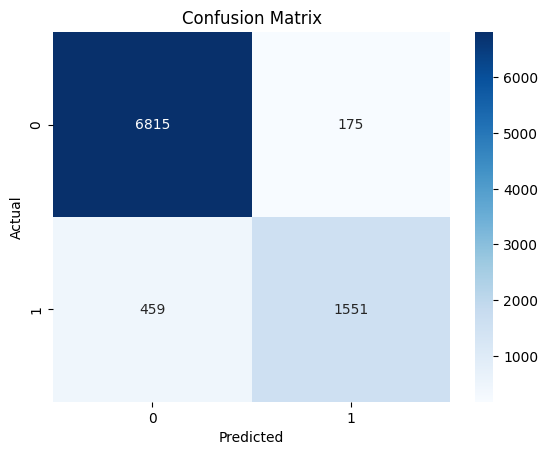

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [28]:
import joblib

# Simpan model ke Google Drive
model_path = '/content/drive/MyDrive/Machine Learning/Hands-On/Classification and Regression/autoMPG.csv'
joblib.dump(model, model_path)
print(f"Model disimpan di: {model_path}")


Model disimpan di: /content/drive/MyDrive/Machine Learning/Hands-On/Classification and Regression/autoMPG.csv
